In [8]:
!pip install mysql-connector-python psycopg2 pandas sqlalchemy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.0/34.0 MB 34.7 MB/s eta 0:00:00


In [9]:
!pip install python-dotenv


In [10]:
!pip install --upgrade python-dotenv


In [11]:
!pip install pymysql psycopg2 pandas sqlalchemy


In [12]:
# import pandas as pd
# from sqlalchemy import create_engine

# # Koneksi ke MySQL
# mysql_user = "avnadmin"
# mysql_password = "AVNS_dwDXpM3IJ7R7UAYZAUo"
# mysql_host = "mysql-1bc61343-irismysql124.g.aivencloud.com"
# mysql_port = "24461"
# mysql_db = "defaultdb"

# mysql_engine = create_engine(f"mysql+pymysql://{mysql_user}:{mysql_password}@{mysql_host}:{mysql_port}/{mysql_db}")

# # Koneksi ke PostgreSQL
# pg_user = "avnadmin"
# pg_password = "AVNS_JJrEiXaVb3VV6gHL57q"
# pg_host = "pg-5dfd4f6-irispostgresql124.g.aivencloud.com"
# pg_port = "22833"
# pg_db = "defaultdb"

# pg_engine = create_engine(f"postgresql+psycopg2://{pg_user}:{pg_password}@{pg_host}:{pg_port}/{pg_db}")

# # Ambil data dari MySQL
# query_mysql = 'SELECT id, "Class", petal_length, petal_width FROM iris_data'
# df_mysql = pd.read_sql(query_mysql, mysql_engine)

# # Ambil data dari PostgreSQL
# query_pg = 'SELECT id, "Class", sepal_length, sepal_width FROM postgresql'
# df_pg = pd.read_sql(query_pg, pg_engine)

# # Gabungkan berdasarkan id dan Class (full outer join untuk menjaga semua data)
# df_combined = pd.merge(df_mysql, df_pg, on=["id", "Class"], how="outer")

# # Simpan ke CSV tanpa mengubah nilai NaN
# df_combined.to_csv("combined_iris.csv", index=False)

# # Print hasil gabungan tanpa indeks tambahan
# print(df_combined.to_string(index=False))


In [13]:
# Install library tambahan jika belum ada
!pip install sqlalchemy pymysql psycopg2 seaborn

# Import library yang dibutuhkan
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv

# Load file .env
load_dotenv()

False

In [14]:
# Koneksi ke MySQL
mysql_user = "avnadmin"
mysql_password = "AVNS_dwDXpM3IJ7R7UAYZAUo"
mysql_host = "mysql-1bc61343-irismysql124.g.aivencloud.com"
mysql_port = "24461"
mysql_db = "defaultdb"

# Membuat koneksi engine ke MySQL
mysql_engine = create_engine(f"mysql+pymysql://{mysql_user}:{mysql_password}@{mysql_host}:{mysql_port}/{mysql_db}")

print("✅ Koneksi ke MySQL berhasil!")


✅ Koneksi ke MySQL berhasil!


In [15]:
# Koneksi ke PostgreSQL
pg_user = "avnadmin"
pg_password = "AVNS_JJrEiXaVb3VV6gHL57q"
pg_host = "pg-5dfd4f6-irispostgresql124.g.aivencloud.com"
pg_port = "22833"
pg_db = "defaultdb"

# Membuat koneksi engine ke PostgreSQL
pg_engine = create_engine(f"postgresql+psycopg2://{pg_user}:{pg_password}@{pg_host}:{pg_port}/{pg_db}")

print("✅ Koneksi ke PostgreSQL berhasil!")


✅ Koneksi ke PostgreSQL berhasil!


In [16]:
# Ambil data dari MySQL
query_mysql = 'SELECT id, Class, petal_length, petal_width FROM iris_data'
df_mysql = pd.read_sql(query_mysql, mysql_engine)

# Ambil data dari PostgreSQL (pastikan nama tabel benar)
query_pg = 'SELECT id, "Class", sepal_length, sepal_width FROM postgresql'
df_pg = pd.read_sql(query_pg, pg_engine)

# Tampilkan beberapa baris pertama dari masing-masing dataset
print("📌 Data dari MySQL:")
print(df_mysql.head())

print("\n📌 Data dari PostgreSQL:")
print(df_pg.head())


📌 Data dari MySQL:
   id        Class  petal_length  petal_width
0   1  Iris-setosa           5.1          3.5
1   2  Iris-setosa           4.9          3.0
2   3  Iris-setosa           4.7          3.2
3   4  Iris-setosa           4.6          3.1
4   5  Iris-setosa           5.0          3.6

📌 Data dari PostgreSQL:
   id        Class  sepal_length  sepal_width
0   1  Iris-setosa           5.1          3.5
1   2  Iris-setosa           4.9          3.0
2   3  Iris-setosa           4.7          3.2
3   4  Iris-setosa           4.6          3.1
4   5  Iris-setosa           5.0          3.6


In [17]:
# Gabungkan data berdasarkan id dan Class
df_combined = pd.merge(df_mysql, df_pg, on=["id", "Class"], how="outer")

# Simpan hasil gabungan ke dalam file CSV
df_combined.to_csv("combined_iris.csv", index=False)

print("✅ Data berhasil digabungkan dan disimpan dalam 'combined_iris.csv'")
print("\nDimensi DataFrame:", df_combined.shape)  # Menampilkan jumlah baris & kolom


✅ Data berhasil digabungkan dan disimpan dalam 'combined_iris.csv'

Dimensi DataFrame: (150, 6)


In [18]:
# Tipe Data
print("\n📌 Tipe Data pada Setiap Kolom:")
print(df_combined.dtypes)

# Cek Missing Values
print("\n📌 Jumlah Missing Values:")
print(df_combined.isnull().sum())

# Statistik Deskriptif
print("\n📌 Statistik Deskriptif:")
print(df_combined.describe())

# Distribusi Class
print("\n📌 Distribusi Class:")
print(df_combined["Class"].value_counts())



📌 Tipe Data pada Setiap Kolom:
id                int64
Class            object
petal_length    float64
petal_width     float64
sepal_length    float64
sepal_width     float64
dtype: object

📌 Jumlah Missing Values:
id              0
Class           0
petal_length    0
petal_width     0
sepal_length    0
sepal_width     0
dtype: int64

📌 Statistik Deskriptif:
               id  petal_length  petal_width  sepal_length  sepal_width
count  150.000000    150.000000   150.000000    150.000000   150.000000
mean    75.500000      5.843333     3.054000      5.843333     3.054000
std     43.445368      0.828066     0.433594      0.828066     0.433594
min      1.000000      4.300000     2.000000      4.300000     2.000000
25%     38.250000      5.100000     2.800000      5.100000     2.800000
50%     75.500000      5.800000     3.000000      5.800000     3.000000
75%    112.750000      6.400000     3.300000      6.400000     3.300000
max    150.000000      7.900000     4.400000      7.900000    

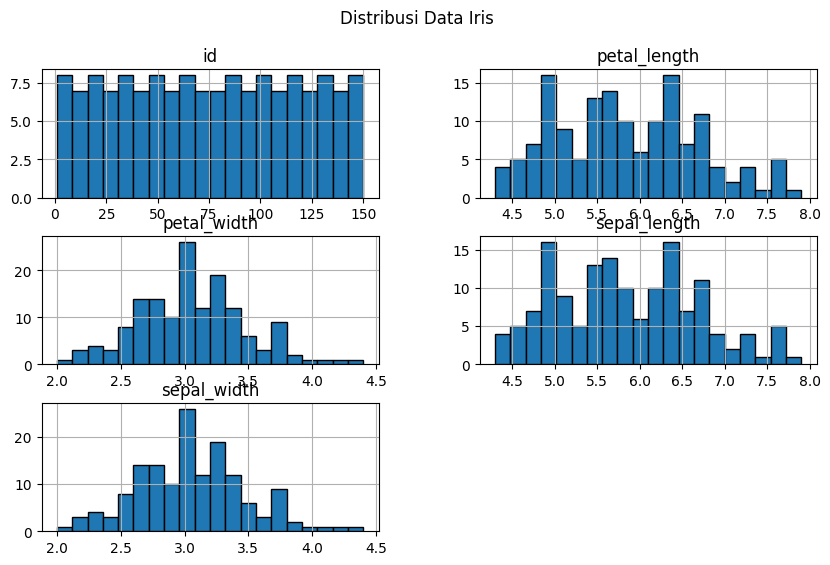

In [19]:
# menampilkan distribusi data dalam bentuk histogram
df_combined.hist(figsize=(10, 6), bins=20, edgecolor="black")
plt.suptitle("Distribusi Data Iris")
plt.show()

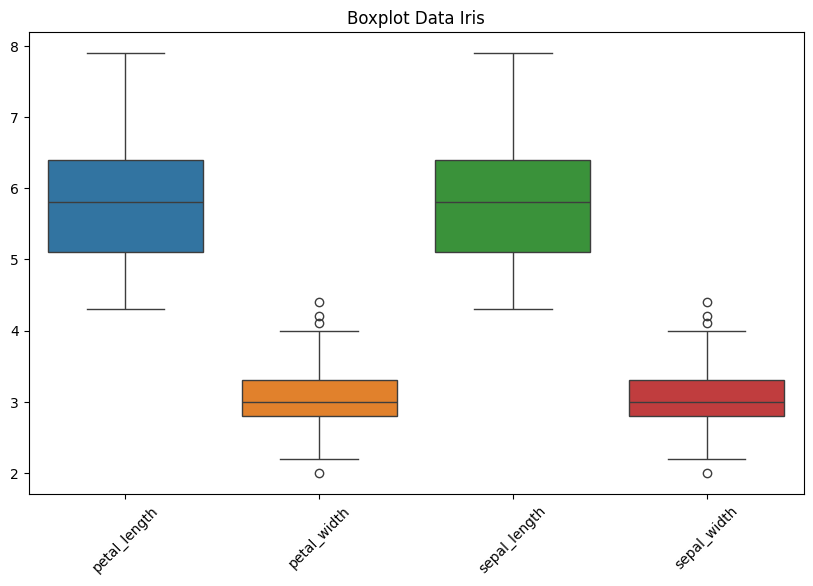

In [20]:
# menampilkan distribusi data menggunakan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_combined.drop(columns=["id", "Class"]))  # Hapus kolom non-numerik
plt.title("Boxplot Data Iris")
plt.xticks(rotation=45)
plt.show()


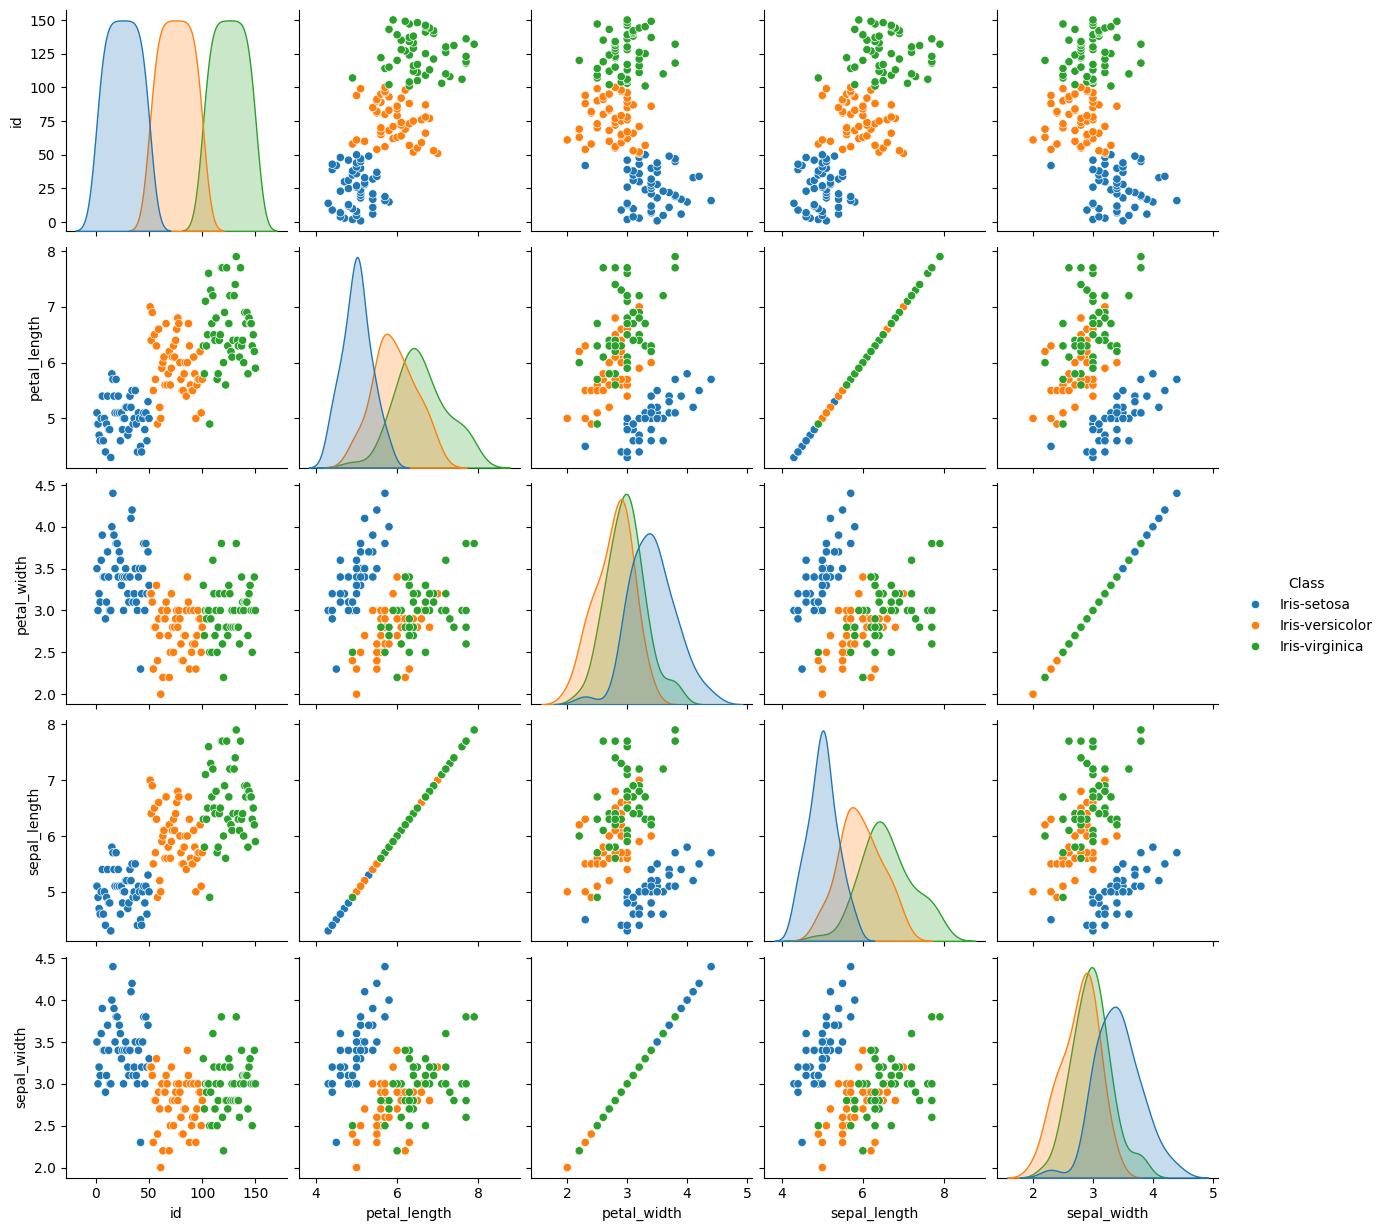

In [21]:
# menampilkan hubungan antar fitur berdasarkan kategori kelas
sns.pairplot(df_combined, hue="Class", diag_kind="kde")
plt.show()


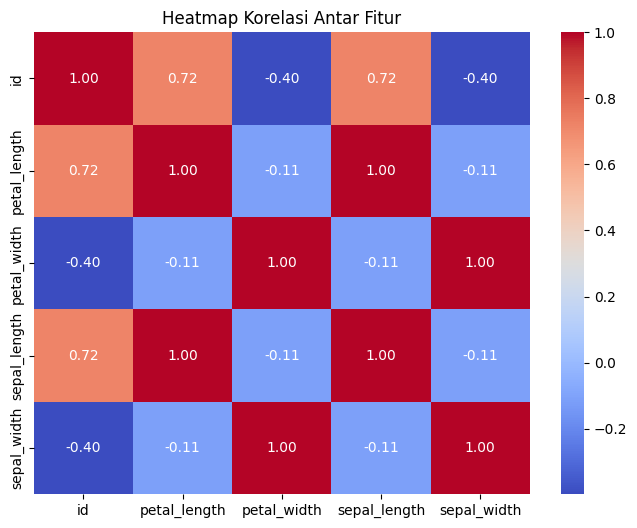

In [22]:
plt.figure(figsize=(8, 6))

# Pilih hanya kolom numerik
df_numeric = df_combined.select_dtypes(include=['number'])

# menampilkan hubungan antar fitur dalam bentuk heatmap
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Heatmap Korelasi Antar Fitur")
plt.show()
